In [1]:
import zipfile
import pandas as pd

In [6]:
!ls ./data

chipotle.tsv names        names.zip


In [3]:
zipfile.ZipFile('./data/names.zip').extractall('./data/names')

In [7]:
open('./data/names/yob2015.txt', 'r').readlines()[:5]

['Emma,F,20415\n',
 'Olivia,F,19638\n',
 'Sophia,F,17381\n',
 'Ava,F,16340\n',
 'Isabella,F,15574\n']

In [9]:
names2015 = pd.read_csv('./data/names/yob2015.txt', names=['Name', 'Sex', 'Babies'])

In [10]:
names2015.head()

,Name,Sex,Babies
0,Emma,F,20415
1,Olivia,F,19638
2,Sophia,F,17381
3,Ava,F,16340
4,Isabella,F,15574


In [12]:
all_years = []
for year in range(1880, 2017):
    all_years.append( pd.read_csv('./data/names/yob%s.txt'%(year), names=['Name', 'Sex', 'Babies']) )
    all_years[-1]['Year'] = year

# combine all the years into the same dataframe with concat()
all_names = pd.concat(all_years)

In [13]:
all_names.head()

,Name,Sex,Babies,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [14]:
all_names.tail()

,Name,Sex,Babies,Year
32863,Zolton,M,5,2016
32864,Zurich,M,5,2016
32865,Zyahir,M,5,2016
32866,Zyel,M,5,2016
32867,Zylyn,M,5,2016


Can use .size() .mean() or .sum() to return a table that formats the groupby'd object

In [15]:
group_name = all_names.groupby(['Sex', 'Year']).size()

In [17]:
group_name.unstack()

Year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Sex,,,,,,,,,,,,,,,,,,,,,
F,942,938,1028,1054,1172,1197,1282,1306,1474,1479,...,20558,20454,20175,19810,19554,19486,19219,19169,19054,18757
M,1058,997,1099,1030,1125,1097,1110,1067,1177,1111,...,14388,14611,14522,14253,14339,14229,14034,14037,14009,14111


In [18]:
names2015.groupby(['Sex']).sum()

,Babies
Sex,
F,1776538
M,1907211


### Pivot Tables
Pivot tables are useful for summarizing data. They can automatically sort, count, total, or average data stored in one table. Then, they can show the results of those actions in a new table of that summarized data.

To construct a pivot table, we’ll first call the DataFrame we want to work with, then the data we want to show, and how they are grouped.

In [ ]:
# This would show Babies gropued by Name on one dimensiona and Year on the other
pd.pivot_table(all_names, 'Babies', 'Name', 'Year')

In [23]:
# Group Name and Year in a list
# This groups the years according to names
# Also excludes years that have NaNs automatically
pd.pivot_table(all_names, 'Babies', ['Name', 'Year'])

Babies
Name      Year        
Aaban     2007     5.0
          2009     6.0
          2010     9.0
          2011    11.0
          2012    11.0
          2013    14.0
          2014    16.0
          2015    15.0
          2016     9.0
Aabha     2011     7.0
          2012     5.0
          2014     9.0
          2015     7.0
          2016     7.0
Aabid     2003     5.0
          2016     5.0
Aabir     2016     5.0
Aabriella 2008     5.0
          2014     5.0
          2015     5.0
          2016    11.0
Aada      2015     5.0
Aadam     1987     5.0
          1988     5.0
          1993     7.0
          1994     6.0
          1995     6.0
          1996     5.0
          1997     5.0
          1998     8.0
...                ...
Zyshawn   2012    10.0
          2013    13.0
          2014     6.0
Zyshon    1998     8.0
          2001     6.0
          2005     5.0
Zyshonne  1998    26.0
          1999    30.0
          2000    17.0
          2001    12.0
          2002     9.0
          2003     7.0
Zytaevius 2012     5.0
Zytaveon  2011     8.0
          2014     8.0
Zytavion  2011     5.0
Zytavious 2002     6.0
          2004     6.0
          2005     5.0
          2006     7.0
          2007     6.0
          2009     7.0
          2010     6.0
Zyus      2015     5.0
Zyva      2016     8.0
Zyvion    2009     5.0
Zyvon     2015     6.0
Zyyanna   2010     6.0
Zyyon     2014     6.0
Zzyzx     2010     5.0

[1726106 rows x 1 columns]

In [24]:
# Order matters!
pd.pivot_table(all_names, 'Babies', ['Year', 'Name'])

Babies
Year Name            
1880 Aaron      102.0
     Ab           5.0
     Abbie       71.0
     Abbott       5.0
     Abby         6.0
     Abe         50.0
     Abel         9.0
     Abigail     12.0
     Abner       27.0
     Abraham     81.0
     Abram       21.0
     Ada        652.0
     Adah        24.0
     Adaline     23.0
     Adam       104.0
     Adda        14.0
     Addie      141.0
     Addison     19.0
     Adela        9.0
     Adelaide    65.0
     Adelbert    28.0
     Adele       41.0
     Adelia      18.0
     Adeline     54.0
     Adella      26.0
     Adelle       5.0
     Aden         7.0
     Adina        5.0
     Adline       8.0
     Adolf        6.0
...               ...
2016 Zylynn       9.0
     Zymarion     8.0
     Zymeir      13.0
     Zymere      25.0
     Zymiah       5.0
     Zymier      12.0
     Zymir       57.0
     Zymire       9.0
     Zynae        5.0
     Zyndaya      5.0
     Zyniah       6.0
     Zyon       110.5
     Zyona        8.0
     Zyonn        6.0
     Zyonna      34.0
     Zyquan       6.0
     Zyra        38.0
     Zyrah       14.0
     Zyree        8.0
     Zyrell       9.0
     Zyren       10.0
     Zyria       11.0
     Zyriah      24.0
     Zyriana      6.0
     Zyrie        6.0
     Zyrion       8.0
     Zyriyah      5.0
     Zyron       12.0
     Zyrus        6.0
     Zyva         8.0

[1726106 rows x 1 columns]

In [22]:
# Can also combine so that we have Name/Sex on one dimension and Year on the other
pd.pivot_table(all_names, 'Babies', ['Name', 'Sex'], 'Year')

,Year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Name,Sex,,,,,,,,,,,,,,,,,,,,,
Aaban,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,6.0,9.0,11.0,11.0,14.0,16.0,15.0,9.0
Aabha,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7.0,5.0,NaN,9.0,7.0,7.0
Aabid,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
Aabir,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
Aabriella,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,5.0,5.0,11.0
Aada,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN
Aadam,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.0,6.0,9.0,7.0,17.0,11.0,16.0,19.0,22.0,18.0
Aadan,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.0,22.0,23.0,11.0,11.0,11.0,13.0,8.0,10.0,NaN
Aadarsh,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.0,13.0,16.0,NaN,7.0,12.0,12.0,18.0,15.0,11.0


Visualize the popularity of a name over the years

In [25]:
all_names_index = all_names.set_index(['Sex','Name','Year']).sort_index()

In [27]:
all_names_index.head(10)

Babies
Sex Name      Year        
F   Aabha     2011       7
              2012       5
              2014       9
              2015       7
              2016       7
    Aabriella 2008       5
              2014       5
              2015       5
              2016      11
    Aada      2015       5

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)

In [46]:
def name_plot(sex, name):
    data = all_names_index.loc[sex, name]
    data.plot()

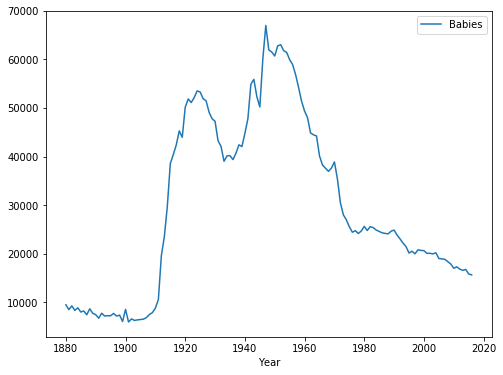

In [47]:
name_plot('M', 'William')

In [48]:
def two(sex, name):
    data = all_names_index.loc[sex, name]
    plt.plot(data)

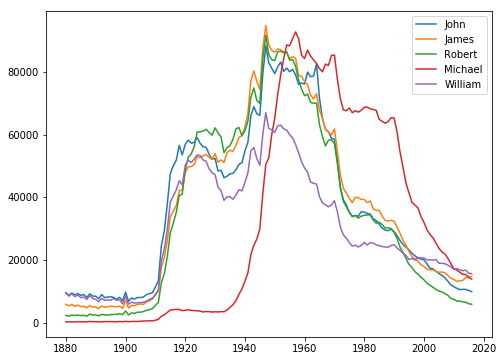

In [51]:
common_names = ['John', 'James', 'Robert', 'Michael', 'William']

for name in common_names:
    two('M', name)
    
plt.legend(common_names)